# Navigation

Target is to find out where the rover can go from the given poistion he is in refernce to the maped naigatable terrain.

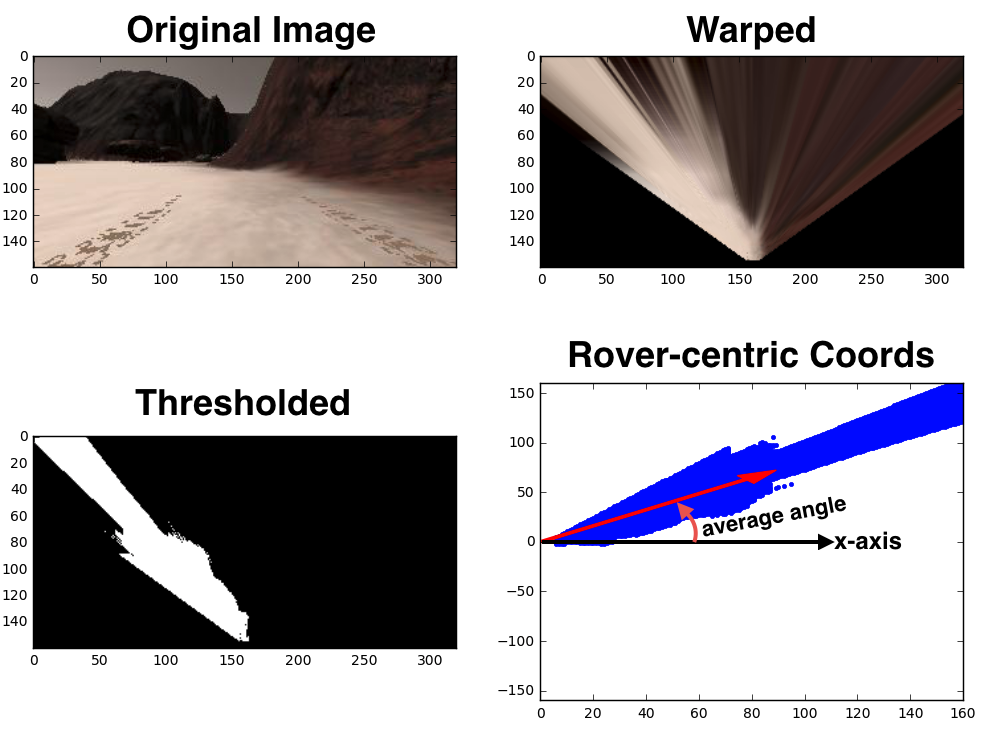

A simple way to decide is to choose the direction with the clearest path or in other words, the most navigable terrain pixels! 
To do this you will first convert your (x, y) pixel positions to polar coordinates, where each pixel position is represented by its distance from the origin and angle counterclockwise from the positive x-direction.

In mathematics, the polar coordinate system is a two-dimensional coordinate system in which each point on a plane is determined by a distance from a reference point and an angle from a reference direction.
The reference point (analogous to the origin of a Cartesian system) is called the pole, and the ray from the pole in the reference direction is the polar axis. The distance from the pole is called the radial coordinate or radius, and the angle is called the angular coordinate, polar angle, or azimuth.

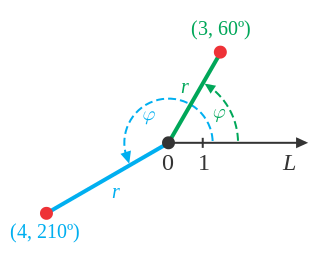

Converting to polar coordinates is a simple two-step process:

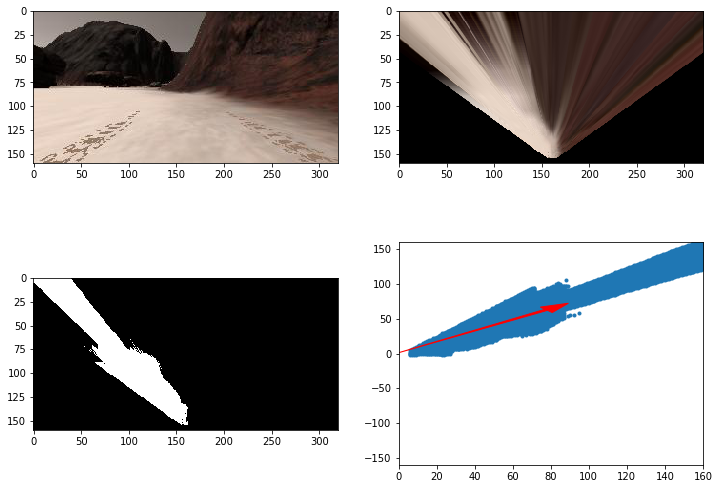

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from extra_functions import perspect_transform, color_thresh, rover_coords

# 1 Define a function to convert from cartesian to polar coordinates
def to_polar_coords(xpix, ypix):
    # Calculate distance to each pixel
    dist = np.sqrt(xpix**2 + ypix**2)
    # Calculate angle using arctangent function
    angles = np.arctan2(ypix, xpix)
    return dist, angles

image = mpimg.imread('angle_example.jpg')
warped = perspect_transform(image) # Perform perspective transform
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160)) # Threshold the warped image
xpix, ypix = rover_coords(colorsel)  # Convert to rover-centric coords
distances, angles = to_polar_coords(xpix, ypix) # Convert to polar coords
avg_angle = np.mean(angles) # Compute the average angle
# Do some plotting
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(colorsel, cmap='gray')
plt.subplot(224)
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(avg_angle)
y_arrow = arrow_length * np.sin(avg_angle)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)
plt.show()

The direction (angle) with that represents the average angle of all navigable terrain pixels in the rover's field of view is at roughly 0.7 radians in the plot above. 
Given the approximate field of view of the camera, the average values for angle that you get will vary between about +/-
​  
​π /4
​​ radians. The input for steering angles you can send to the rover is in degrees over the range -15 (to the right) to +15 (to the left), so the last step is to choose a conversion between your average angle and the steering angle you want to send to the rover. The simplest thing to do would be to convert to degrees and clip to the range +/- 15 like this:

`avg_angle_degrees = avg_angle * 180/np.pi
steering = np.clip(avg_angle_degrees, -15, 15)`